# UNIT 2  GROUP WORK - Data Engineering for Health Data Science

#### Team Boolean members:
- Sol Andres
- Peter Edwards
- Kamal Masarweh
    

<a id="top"></a>

<b>Table of contents</b><br>

PART 1 -  [QUANTITIES](#quantity)

PART 2 - [COSTS](#cost)

PART 3 - [GEOGRAPHICAL DATA](#geographical)

In [22]:
##Settings

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # for creating graphs from 2 series

# script for changeing figure size & dpi
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True) ##To propagate the size change to an existing GUI window, add forward=True:
fig.set_dpi(100)

# read the CSV file
epd_20 = pd.read_csv('EPD_202004.csv')
epd_21 = pd.read_csv('EPD_202104.csv')

#epd_21


<Figure size 1000x400 with 0 Axes>

<a id="quantity"></a>
# Part 1 : QUANTITIES

In [23]:
# 2021 prescriptions overall quantity

drug_quantity_21 = epd_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
#drug_quantity_21.head(20)


In [24]:
# 2021 prescriptions  - 10 most prescribed 
drug_count_21 = epd_21["CHEMICAL_SUBSTANCE_BNF_DESCR"].value_counts()
drug_count_21.head(40)


Colecalciferol                                3970
Co-codamol (Codeine phosphate/paracetamol)    3568
Other Appliances                              3493
Emollients                                    3265
Enteral nutrition                             3018
Metformin hydrochloride                       2616
Pregabalin                                    2472
Wound Management & Other Dressings            2296
Quetiapine                                    2212
Eye Products                                  2171
Gabapentin                                    2132
Paracetamol                                   2096
Hydrocortisone                                2062
Other emollient preparations                  2015
Venlafaxine                                   1978
Glucose blood testing reagents                1936
Ramipril                                      1867
Macrogol 3350                                 1840
Levothyroxine sodium                          1781
Morphine sulfate               

In [25]:
# 2020 prescriptions overall quantity

drug_quantity_20 = epd_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_20



,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Catheters,120.0
1,Lubricant Gels,66.0
2,Enteral nutrition,45000.0
3,Thiamine hydrochloride,112.0
4,Leg Bags,10.0
...,...,...
216314,Cyclizine hydrochloride,14.0
216315,Nitrofurantoin,12.0
216316,Betamethasone valerate,210.0
216317,Aripiprazole,168.0


In [26]:
# 2020 prescriptions  - 10 most prescribed 

drug_count_20 = epd_20["CHEMICAL_SUBSTANCE_BNF_DESCR"].value_counts()
drug_count_20.head(29)

Colecalciferol                                3598
Co-codamol (Codeine phosphate/paracetamol)    3383
Other Appliances                              3213
Emollients                                    3000
Enteral nutrition                             2957
Metformin hydrochloride                       2488
Wound Management & Other Dressings            2333
Paracetamol                                   2245
Pregabalin                                    2233
Gabapentin                                    2025
Quetiapine                                    2016
Eye Products                                  1979
Other emollient preparations                  1970
Hydrocortisone                                1936
Beclometasone dipropionate                    1884
Ramipril                                      1879
Glucose blood testing reagents                1871
Venlafaxine                                   1864
Morphine sulfate                              1809
Macrogol 3350                  

<AxesSubplot:>

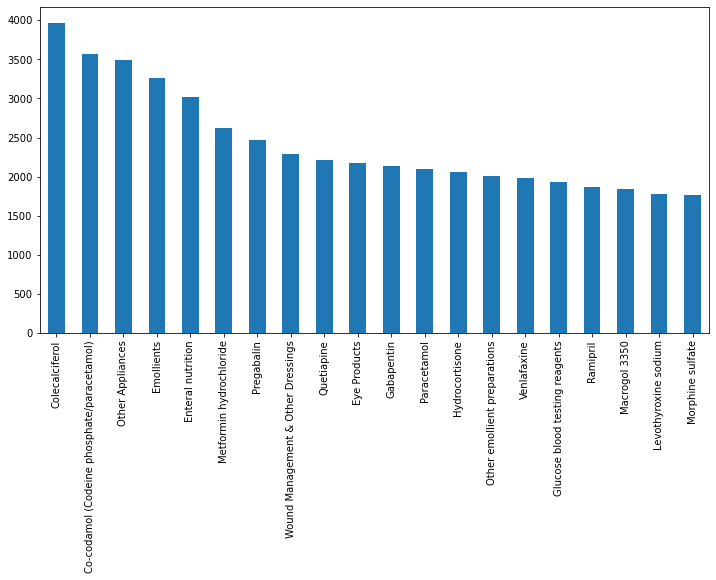

In [27]:
# Separate bar chart for most prescribed drugs 2021

drug_21_main = drug_count_21.head(20)
drug_21_main.plot.bar(figsize=(12,6))

<AxesSubplot:>

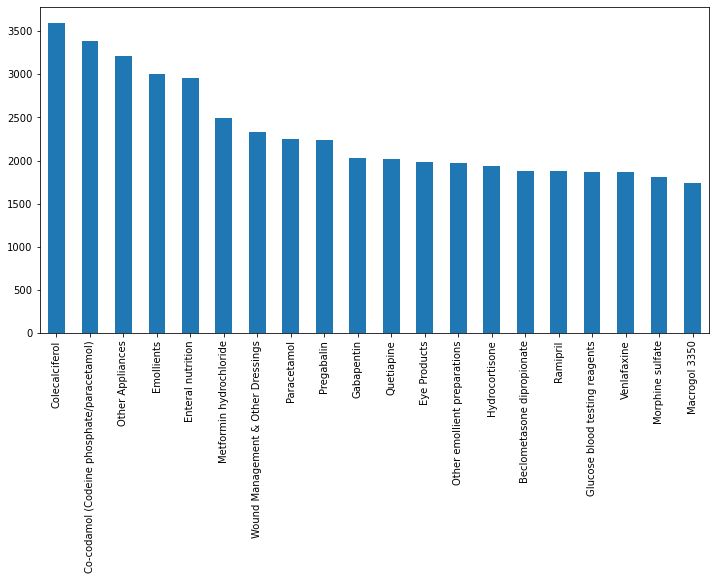

In [28]:
# Separate bar chart for most prescribed drugs 2020

drug_20_main = drug_count_20.head(20)
drug_20_main.plot.bar(figsize=(12,6))

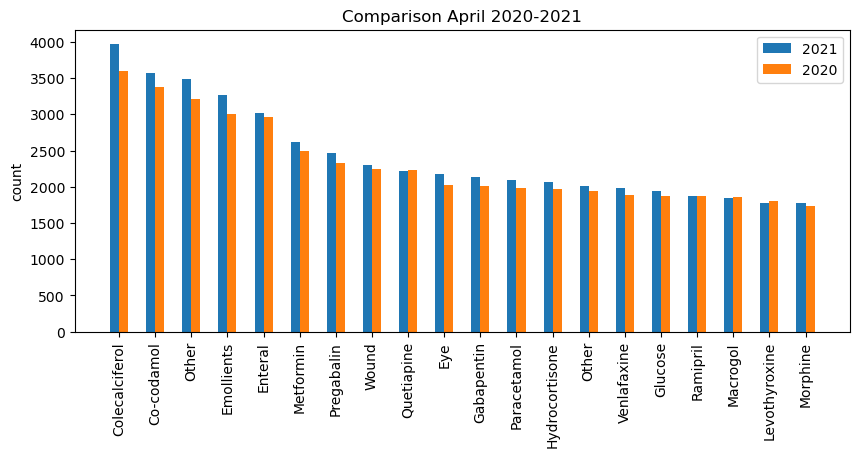

In [29]:
# comparison bar chart between two years - prescriptions

x = np.arange(len(drug_21_main.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_21_main , width, label='2021')
rects2 = ax.bar(x + width/2, drug_20_main, width, label='2020')

#text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x)

first_word = pd.Series(drug_21_main.keys().tolist()) ## turn series to list
first = first_word.str.split(' ').str[0] ## get 1st word from list for the x axis legend

ax.set_xticklabels(first, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)


In [30]:
# 2021 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_21 = epd_21["BNF_CHAPTER_PLUS_CODE"].value_counts()

# 2021 prescriptions  - 10 most prescribed GROUPS
group_21_main = drug_group_21.head(10)
group_21_main

04: Central Nervous System                                 56409
02: Cardiovascular System                                  32331
06: Endocrine System                                       21260
01: Gastro-Intestinal System                               16416
09: Nutrition and Blood                                    16260
13: Skin                                                   13853
03: Respiratory System                                     12776
21: Appliances                                             11886
05: Infections                                              8513
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7630
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [31]:
# 2020 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_20 = epd_20["BNF_CHAPTER_PLUS_CODE"].value_counts()

# 2021 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_21=group_cost_21.head(15)
group_cost_main_21

# 2020 prescriptions  - 10 most prescribed GROUPS
group_20_main = drug_group_20.head(10)
group_20_main

04: Central Nervous System                                 54743
02: Cardiovascular System                                  32049
06: Endocrine System                                       20310
01: Gastro-Intestinal System                               15939
09: Nutrition and Blood                                    15866
03: Respiratory System                                     13242
13: Skin                                                   13058
21: Appliances                                             10852
05: Infections                                              8995
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7405
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

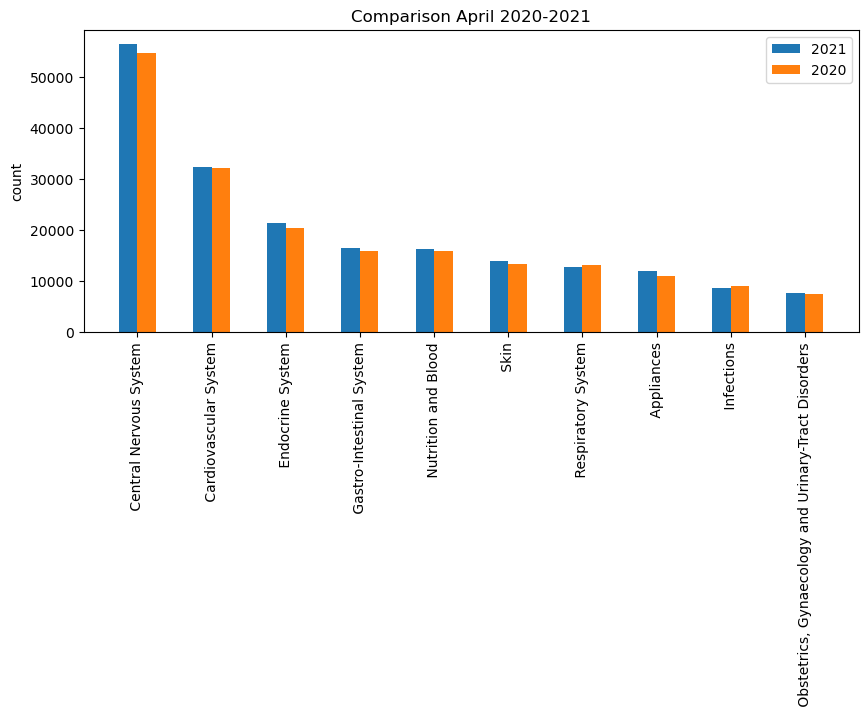

In [32]:
# comparison bar chart between two years - prescriptions as GROUPS (BNF_CHAPTER_PLUS_COD)

x = np.arange(len(group_21_main.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_21_main , width, label='2021')
rects2 = ax.bar(x + width/2, group_20_main , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x)

second_word = pd.Series(group_21_main.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

<a id="cost"></a>

## PART 2 - COSTS

In [33]:
## COSTS OF PRESCRIPTIONS

# 2021 total cost of presciptions
overall_cost_21 = epd_21['ACTUAL_COST'].sum()
# 2020 total cost of presciptions
#overall_cost_20 = epd_20['ACTUAL_COST'].sum()


In [34]:
# 2021 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_21=group_cost_21.head(15)
group_cost_main_21

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                33.155450
02: Cardiovascular System                                   31.427788
03: Respiratory System                                      73.143055
04: Central Nervous System                                  25.938845
05: Infections                                              20.338859
06: Endocrine System                                        65.187693
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     26.182677
08: Malignant Disease and Immunosuppression                 75.989270
09: Nutrition and Blood                                     45.553604
10: Musculoskeletal and Joint Diseases                      20.790925
11: Eye                                                     21.714533
12: Ear, Nose and Oropharynx                                28.464686
13: Skin                                                    24.216060
14: Immunological Products and Vaccines                    260.73079

In [35]:
# 2020 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_20 = epd_20.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_20=group_cost_20.head(15)
group_cost_main_20

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               29.393818
02: Cardiovascular System                                  28.543309
03: Respiratory System                                     73.115024
04: Central Nervous System                                 27.749504
05: Infections                                             20.131416
06: Endocrine System                                       64.654654
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    26.282968
08: Malignant Disease and Immunosuppression                70.478257
09: Nutrition and Blood                                    45.682255
10: Musculoskeletal and Joint Diseases                     20.963553
11: Eye                                                    21.869329
12: Ear, Nose and Oropharynx                               28.845989
13: Skin                                                   23.395512
14: Immunological Products and Vaccines                    53.750129
15: Anaesthe

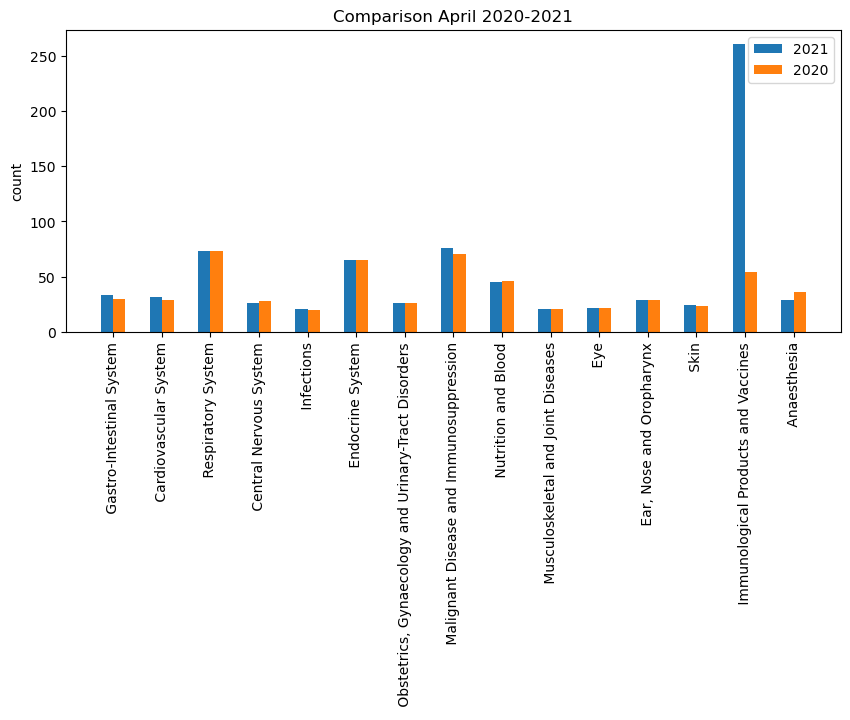

In [36]:
# comparison bar chart between two years - prescription costs of main 15 GROUPS (BNF_CHAPTER_PLUS_COD)

x = np.arange(len(group_cost_main_21.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_cost_main_21 , width, label='2021')
rects2 = ax.bar(x + width/2, group_cost_main_20 , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x,)
             
second_word = pd.Series(group_cost_main_21.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)
    
ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

In [37]:
# trying to analyze the difference in cost in "14: Immunological Products and Vaccines"

vaccines_21 = epd_21.loc[epd_21["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']

vaccines_cost_21=vaccines_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_21

,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
794,Diphtheria,7.27746
5563,Influenza,2917.94447
6973,Influenza,1341.24108
8364,Diphtheria,7.26506
9799,Hepatitis B,24.19822
...,...,...
217015,Typhoid,10.39462
217184,Hepatitis B,24.19822
217742,Hepatitis A,41.25248
217753,Influenza,27.77487


In [38]:
vaccines_cost_21_mean=vaccines_cost_21.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_21_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,9.908025
Hepatitis A,28.414159
Hepatitis A/hepatitis B,108.598615
Hepatitis A/typhoid vaccine,66.614970
Hepatitis B,38.813369
"Human papillomavirus (Type 6,11,16,18)",443.121835
Influenza,1468.270725
Meningococcal A + C + W135 + Y vaccine,55.885045
Pneumococcal,63.309258


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

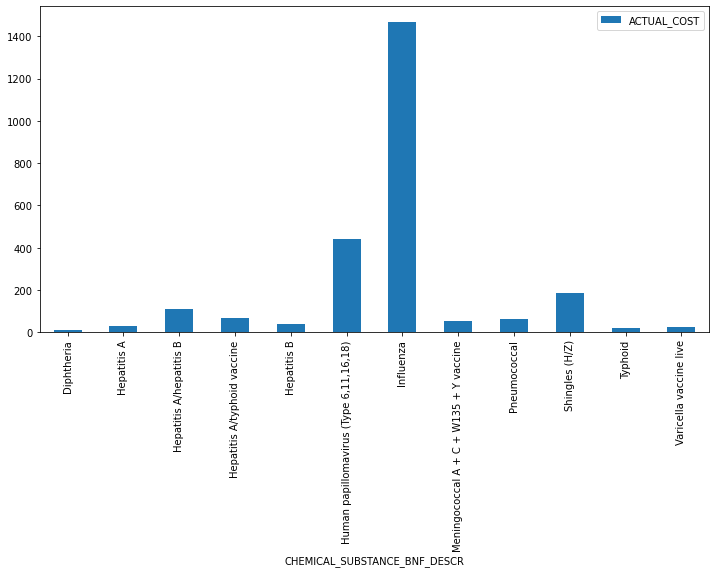

In [39]:
vaccines_cost_21_mean.plot.bar(figsize=(12,6))

In [40]:
vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']

vaccines_cost_20 = vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]

In [41]:
vaccines_cost_20_mean=vaccines_cost_20.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_20_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,15.319871
Hepatitis A,96.773728
Hepatitis A/hepatitis B,38.652000
Hepatitis A/typhoid vaccine,138.507648
Hepatitis B,20.729385
Influenza,94.380929
"Measles, mumps and rubella vaccine",7.126800
Meningococcal A + C + W135 + Y vaccine,27.887450
Pneumococcal,48.762932


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

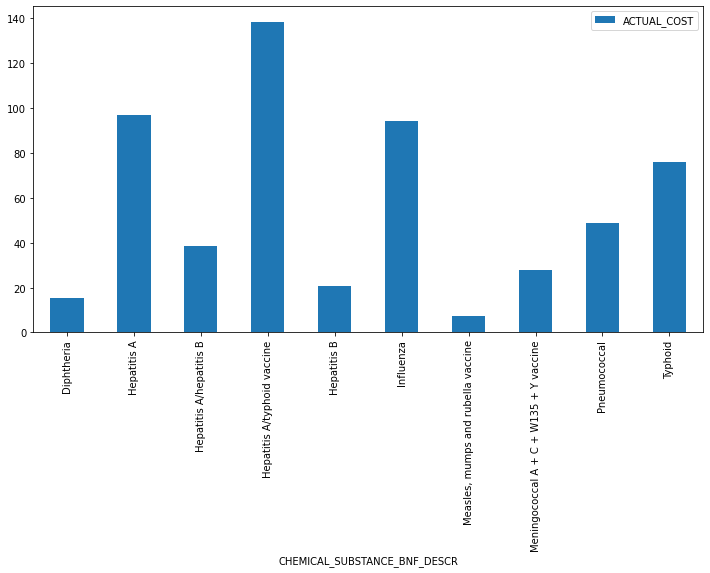

In [42]:
vaccines_cost_20_mean.plot.bar(figsize=(12,6))

In [43]:
total_quantity_20 = epd_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY","ACTUAL_COST"]]
total_quantity_20.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY,ACTUAL_COST
0,Catheters,120.0,206.59020
1,Lubricant Gels,66.0,5.46594
2,Enteral nutrition,45000.0,493.89907
3,Thiamine hydrochloride,112.0,4.63946
4,Leg Bags,10.0,28.16632
5,Leg Bags,20.0,48.61711
6,Colostomy Bags,120.0,275.30487
7,Discharge Solidifying Agents,100.0,29.88605
8,Catheters,150.0,216.36010
9,Adhesive Removers (Sprays/Liquids/Wipes),300.0,50.97825


In [47]:
total_quantity_21= epd_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY","ACTUAL_COST"]]
#total_quantity_212222=total_quantity_21[int("TOTAL_QUANTITY") * int("ACTUAL_COST")]
ss=epd_21["TOTAL_QUANTITY"]


<a id="geographical"></a>

## PART 3 - GEOGRAPHICAL DATA